
 
**Let's import the matrix of the embeddings** 

In [1]:
import numpy as np 
path = "./embedding_MovieLens20M 1.npy"
import matplotlib.pyplot as plt



embedding_array = np.load(path)
feature_embedding_array= embedding_array.T
n, d = embedding_array.shape
print(n,d)

10000 200


**We will select randomly two features of embeddings from the 200 features that we have and then we will plot one feature vector of dimension the number of users-embeddings in function of the second feature.**

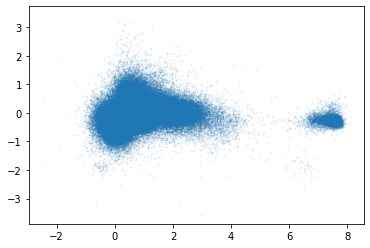

In [ ]:
plt.scatter(feature_embedding_array[1],feature_embedding_array[10], alpha = 0.1 , s= 0.7)

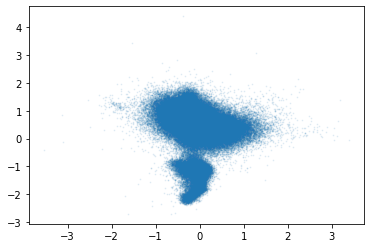

In [ ]:
plt.scatter(feature_embedding_array[10],feature_embedding_array[20] , alpha=0.1 , s= 0.6)

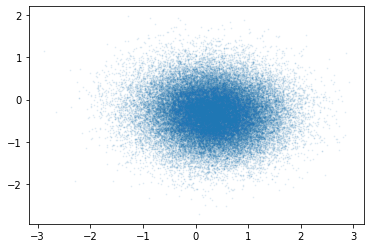

In [ ]:
plt.scatter(feature_embedding_array[5],feature_embedding_array[199] , alpha = 0.1 , s= 0.6)

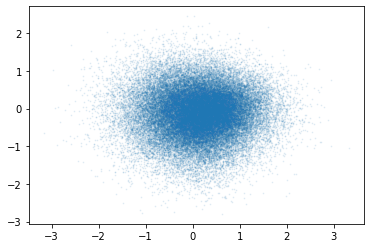

In [ ]:
plt.scatter(feature_embedding_array[30],feature_embedding_array[60], alpha = 0.1 , s=0.6)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

norms = np.zeros(n)

for i in range(n):
    norm = np.linalg.norm(embedding_array[i, :])
    norms[i] = norm

print("The maximum norm is {}".format(norms.max()))
print("The minimum norm is {}".format(norms.min()))

The maximum norm is 27.01224708557129
The minimum norm is 4.659762382507324


**Approach 1** : let’s verify this relation: $ \log{R(k)}= \frac{1}{d}log(k) + const \quad{} $  with k is the k-th neighbor of a query point and R(k) is the distance to this neighbor. We will sort the norms of the users embeddings and then we will associate this ordered norms to the indices of users in our test dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


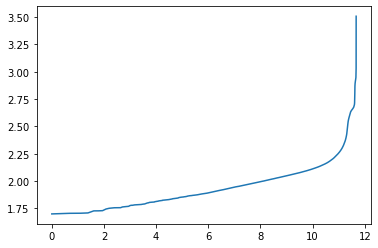

In [ ]:
norms = np.log(np.sort(norms))
indices = np.log(np.arange(n))

plt.plot(indices, norms)
plt.show()

**Approach2** : This approach consists in looking at the distribution of the norms of the users embeddings . We will discover the distribution of the norms on the Netflix dataset.

<BarContainer object of 99 artists>

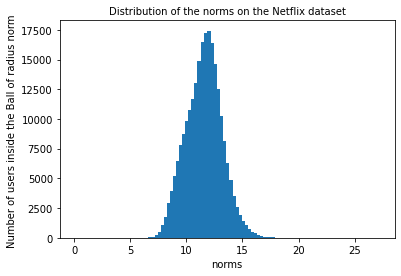

In [ ]:
import matplotlib.pyplot as plt
maxi = norms.max()
r = np.linspace(0, maxi, 100)
len_inside_ball = []

for j in range (1, len(r)): 
    count = 0
    for i in range (len(embedding_array)):
        norm = np.linalg.norm(embedding_array[i])
        if (r[j-1] <= norm) and (norm < r[j]):
            count += 1
    
    len_inside_ball.append(count)

plt.title('Distribution of the norms on the Netflix dataset', fontsize = 10)
plt.xlabel("norms", fontsize = 10)
plt.ylabel("Number of users inside the Ball of radius norm ", fontsize = 10)
plt.bar(r[1:], len_inside_ball, width=0.4)

**Approach3** : This approach consists in looking at the distribution of the angles of the users embeddings with one randomly selected vector in one 200 dimensional space . We will discover the distribution of the angles on the Netflix dataset. 

In [ ]:
from math import *

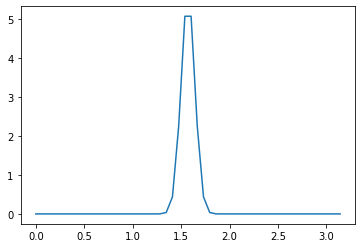

In [ ]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
angles = np.linspace(0,np.pi,50)
data=((1/sqrt(np.pi))*(math.gamma(100)/math.gamma(99.5))*((np.sin(angles)))**198)
plt.plot( angles , data  )

**Approach4** : We have choosed this technique of clustering because it is the most efficient technique  to classify our  embeddings into clusters to have an idea about the distribution of our embeddings  , this technique is the generalisation of the K-means technique. In fact  K-means is the Gaussian Mixture model  when the variance of the Random gaussian variables  on this mixture is Identity. In the RecVAE model they modelize the distribution of their embeddings by one Gaussian mixture model but the variance of their gaussian variables in this mixture is not Identity. This is why K-means will not give a relevant informations about the classification of the embeddings.Furthermore,K-means has two main drawbacks as the lack of flexibility in cluster shape and lack of probabilistic cluster assignment. As a result we have choosed to fit our embeddings by using this technique of Gaussian Mixture Model with different number of components and we verify  the quality of the fit for each value of number of components used to get an idea about the uniformity of the distribution of our user-embedings. The BIC:Bayesian information criterion is a criterion for model selection among a finite set of models , the model with the lowest BIC is preferred because the BIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.  There is another criterion similar to BIC is AIC: Akaike information criterion  like an estimator of  the quality of each model, relative to each of the other models. AIC provides a means for model selection. In estimating the amount of information lost by a model, AIC deals with the trade-off between the goodness of fit  of the model and the simplicity of the model. In other words, AIC deals with both the risk of overfitting and the risk of underfitting. When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC attempt to resolve this problem by introducing a penalty term for the number of parameters in the model,  the penalty term is larger in BIC than in AIC this is why we have choosed to work with BIC in our experiment. So After fitting the embedding-array with this model we have measured the BIC values associated to each value of components. The plot below illustrate the variation of the BIC in function of the number of components.

In [2]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

n_components_list = list(range(1, 10))
bic_value_list = list(range(1, 10))


for n_components in n_components_list:
    print("Fitting GMM with {} components...".format(n_components))
    gmm_model = GaussianMixture(n_components=n_components).fit(embedding_array)
    bic = gmm_model.bic(embedding_array)
    bic_value_list[n_components-1] = bic
    print("BIC={}".format(bic))
    print("#"*30)

Fitting GMM with 1 components...
BIC=2107673.2180915787
##############################
Fitting GMM with 2 components...
BIC=1805025.3921050539
##############################
Fitting GMM with 3 components...
BIC=1667137.745797924
##############################
Fitting GMM with 4 components...
BIC=1728748.01076639
##############################
Fitting GMM with 5 components...
BIC=1779377.4513448183
##############################
Fitting GMM with 6 components...
BIC=1884106.4208722538
##############################
Fitting GMM with 7 components...
BIC=1947635.511134815
##############################
Fitting GMM with 8 components...
BIC=2149253.2096273974
##############################
Fitting GMM with 9 components...
BIC=2294042.8051831285
##############################


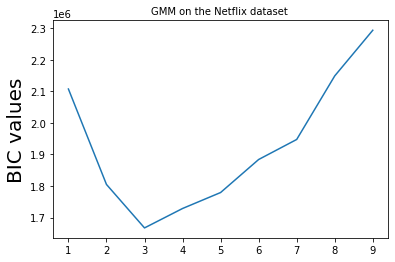

In [3]:
import matplotlib.pyplot as plt
plt.title('GMM on the Netflix dataset ', fontsize = 10)
plt.ylabel("BIC values", fontsize = 20)
plt.plot(n_components_list, bic_value_list)

**Approach 5 :** Let's visualize the distribution of the embeddings in two dimensions with the UMAP and T-SNE techniques.

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.2, n_components=199, n_epochs=None,
     n_neighbors=20, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=True)
Construct fuzzy simplicial set
Thu Jul  9 12:51:11 2020 Finding Nearest Neighbors
Thu Jul  9 12:51:11 2020 Building RP forest with 10 trees
Thu Jul  9 12:51:12 2020 NN descent for 13 iterations
	 0  /  13
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
Thu Jul  9 12:51:21 2020 Finished Nearest Neighbor Search
Thu Jul  9 12:51:24 2020 Construct embedding
	c

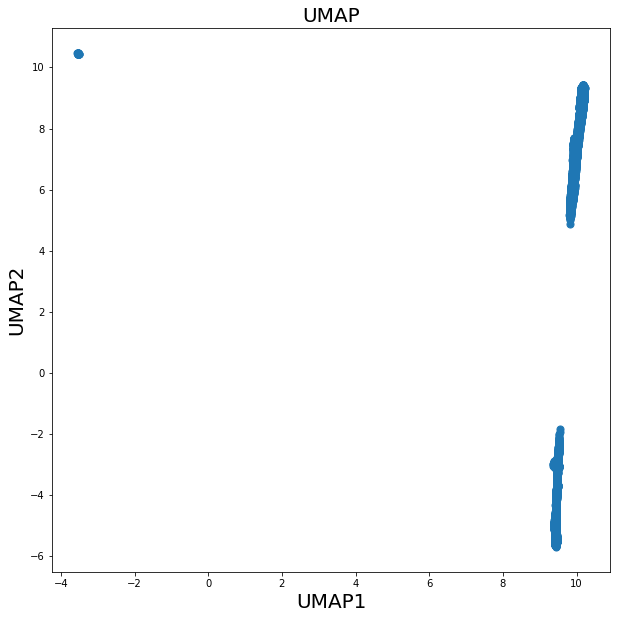

In [4]:
from umap import UMAP

plt.figure(figsize=(10,10))
model = UMAP(n_neighbors = 20 , min_dist = 0.20, n_components = 199, verbose = True)
umap = model.fit_transform(embedding_array)
plt.scatter(umap[:, 0], umap[:, 1] , cmap = 'tab10' , s=50 )
plt.title('UMAP', fontsize = 20)
plt.xlabel("UMAP1", fontsize = 20)
plt.ylabel("UMAP2", fontsize = 20)
plt.show()

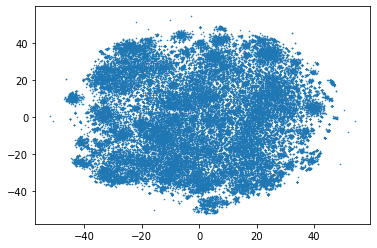

In [ ]:
from sklearn.manifold import TSNE
tsne_array = TSNE(n_components=2).fit_transform(embedding_array)
plt.scatter(tsne_array[:,0], tsne_array[:,1] , s = 0.3)
